# Project 5 - Air Toxicity and Chronic Respiratory Diseases - Kaggel Competition

## Import library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# read train csv dataset from 01a notebook

train = pd.read_csv('../train_with_5_parquet.csv')
train.head()

,Unnamed: 0,ID,State.Name,Year,Age,Incidence,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x",...,"('Arithmetic.Mean', 'o-Ethyltoluene')","('Arithmetic.Mean', 'o-Xylene')","('Arithmetic.Mean', 'p-Diethylbenzene')","('Arithmetic.Mean', 'p-Ethyltoluene')","('Arithmetic.Mean', 'tert-Butyl ethyl ether')","('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')"
0,0,f8312a4,Alabama,1990,65-69,4685.284313,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,3effa36,Alabama,1990,70-74,4827.052043,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1e8044b,Alabama,1990,75-79,4377.956914,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,d875d65,Alabama,1990,80-84,3822.732993,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,46e6695,Alabama,1990,85-89,3470.199503,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# read test csv dataset from 01a notebook

test = pd.read_csv('../test_with_5_parquet.csv')
test.head()

,Unnamed: 0,ID,State.Name,Year,Age,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x",...,"('Arithmetic.Mean', 'o-Ethyltoluene')","('Arithmetic.Mean', 'o-Xylene')","('Arithmetic.Mean', 'p-Diethylbenzene')","('Arithmetic.Mean', 'p-Ethyltoluene')","('Arithmetic.Mean', 'tert-Butyl ethyl ether')","('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')"
0,0,6c06615,Delaware,1990,65-69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,e0cf76e,Delaware,1990,70-74,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,e9f95f0,Delaware,1990,75-79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,5dffe44,Delaware,1990,80-84,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,9f9ea9b,Delaware,1990,85-89,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
test.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
train.isnull().sum()

ID                                                      0
State.Name                                              0
Year                                                    0
Age                                                     0
Incidence                                               0
                                                     ... 
('Arithmetic.Mean', 'tert-butyl alcohol')            4422
('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')    2826
('Arithmetic.Mean', 'trans-1,3-Dichloropropene')     2262
('Arithmetic.Mean', 'trans-2-Butene')                2970
('Arithmetic.Mean', 'trans-2-Pentene')               2988
Length: 172, dtype: int64

### Imputing: fill NA with 0 

In [ ]:
# create a simple model to see the performance of dataset

In [7]:
train = train.fillna(0)
train.head()

,ID,State.Name,Year,Age,Incidence,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x",...,"('Arithmetic.Mean', 'o-Ethyltoluene')","('Arithmetic.Mean', 'o-Xylene')","('Arithmetic.Mean', 'p-Diethylbenzene')","('Arithmetic.Mean', 'p-Ethyltoluene')","('Arithmetic.Mean', 'tert-Butyl ethyl ether')","('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')"
0,f8312a4,Alabama,1990,65-69,4685.284313,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3effa36,Alabama,1990,70-74,4827.052043,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1e8044b,Alabama,1990,75-79,4377.956914,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d875d65,Alabama,1990,80-84,3822.732993,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,46e6695,Alabama,1990,85-89,3470.199503,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test = test.fillna(0)
test.head()

,ID,State.Name,Year,Age,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x","('Arithmetic.Mean', 'Acrolein - Verified')_x",...,"('Arithmetic.Mean', 'o-Ethyltoluene')","('Arithmetic.Mean', 'o-Xylene')","('Arithmetic.Mean', 'p-Diethylbenzene')","('Arithmetic.Mean', 'p-Ethyltoluene')","('Arithmetic.Mean', 'tert-Butyl ethyl ether')","('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')"
0,6c06615,Delaware,1990,65-69,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,e0cf76e,Delaware,1990,70-74,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,e9f95f0,Delaware,1990,75-79,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5dffe44,Delaware,1990,80-84,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9f9ea9b,Delaware,1990,85-89,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
train_dummy = pd.get_dummies(train, columns=['Age'], drop_first=True)
train_dummy.head()

,ID,State.Name,Year,Incidence,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x","('Arithmetic.Mean', 'Acrolein - Verified')_x",...,"('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')",Age_70-74,Age_75-79,Age_80-84,Age_85-89,Age_90-94
0,f8312a4,Alabama,1990,4685.284313,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,3effa36,Alabama,1990,4827.052043,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,1e8044b,Alabama,1990,4377.956914,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,d875d65,Alabama,1990,3822.732993,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,46e6695,Alabama,1990,3470.199503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [10]:
test_dummy = pd.get_dummies(test, columns=['Age'], drop_first=True)
test_dummy.head()

,ID,State.Name,Year,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x","('Arithmetic.Mean', 'Acrolein - Verified')_x","('Arithmetic.Mean', 'Arsenic (TSP) STP')",...,"('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')",Age_70-74,Age_75-79,Age_80-84,Age_85-89,Age_90-94
0,6c06615,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,e0cf76e,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,e9f95f0,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,5dffe44,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,9f9ea9b,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [11]:
train_dummy.to_csv('../train_model.csv')

In [12]:
test_dummy.to_csv('../test_model.csv')

## Modeling 

In [13]:
train = pd.read_csv('../train_model.csv')
train.head()

,Unnamed: 0,ID,State.Name,Year,Incidence,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x",...,"('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')",Age_70-74,Age_75-79,Age_80-84,Age_85-89,Age_90-94
0,0,f8312a4,Alabama,1990,4685.284313,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,1,3effa36,Alabama,1990,4827.052043,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,2,1e8044b,Alabama,1990,4377.956914,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,3,d875d65,Alabama,1990,3822.732993,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,4,46e6695,Alabama,1990,3470.199503,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [14]:
train.drop(columns=['Unnamed: 0'], inplace=True)

In [15]:
X = train.drop(columns= ['ID','State.Name','Incidence'])
y = train['Incidence']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [19]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
lr.score(X_train,y_train), lr.score(X_test, y_test)

(0.8295732274853848, 0.8192239912104367)

In [21]:
lr_preds = lr.predict(X_test)

In [23]:
RMSE_lr = np.sqrt(mean_squared_error(y_test,lr_preds))
RMSE_lr

653.5173057974237

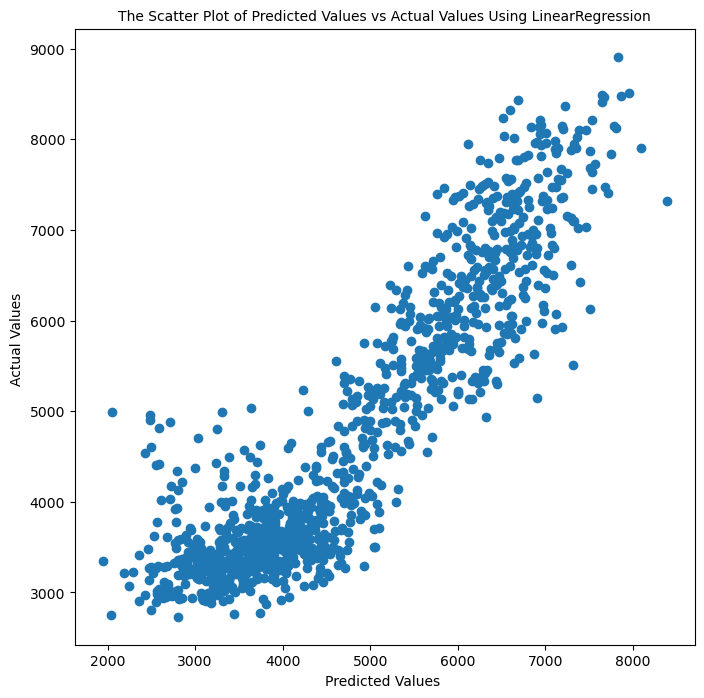

In [29]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(lr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using LinearRegression', size=10)
plt.show();

### Result
* The train score and test score is high.
* Could try different imputer and model for this train dataset

In [ ]:
# predict the test dataset

In [24]:
test = pd.read_csv('../test_model.csv')
test.drop(columns=['Unnamed: 0'], inplace=True)
test.head()

,ID,State.Name,Year,"('Arithmetic.Mean', '1,1,2,2-Tetrachloroethane')_x","('Arithmetic.Mean', '1,2-Dichloropropane')_x","('Arithmetic.Mean', '1,3-Butadiene')_x","('Arithmetic.Mean', 'Acetaldehyde')_x","('Arithmetic.Mean', 'Acrolein - Unverified')_x","('Arithmetic.Mean', 'Acrolein - Verified')_x","('Arithmetic.Mean', 'Arsenic (TSP) STP')",...,"('Arithmetic.Mean', 'tert-butyl alcohol')","('Arithmetic.Mean', 'trans-1,2-Dichloroethylene')","('Arithmetic.Mean', 'trans-1,3-Dichloropropene')","('Arithmetic.Mean', 'trans-2-Butene')","('Arithmetic.Mean', 'trans-2-Pentene')",Age_70-74,Age_75-79,Age_80-84,Age_85-89,Age_90-94
0,6c06615,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,e0cf76e,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0
2,e9f95f0,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
3,5dffe44,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0
4,9f9ea9b,Delaware,1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0


In [25]:
test_predict = test.drop(columns = ['ID','State.Name'])

In [26]:
test_preds = lr.predict(test_predict)

In [27]:
test_preds_lr = pd.DataFrame({
    'ID': test['ID'],
    'Incidence': test_preds,
})

test_preds_lr.head()

,ID,Incidence
0,6c06615,2571.497532
1,e0cf76e,3168.975516
2,e9f95f0,3639.144510
3,5dffe44,3424.118846
4,9f9ea9b,2887.337663


In [ ]:
#test_preds_lr.to_csv('../lr_model.csv', index=False)